# Project 1: Explanatory Data Analysis & Data Presentation (Movies Dataset)

## Data Import and first Inspection

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.options.display.max_columns = 30
pd.options.display.float_format = "{:.2f}".format

In [4]:
df = pd.read_csv("movies_complete.csv", parse_dates=["release_date"])

In [5]:
df

,id,title,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,production_countries,vote_count,vote_average,popularity,runtime,overview,spoken_languages,poster_path,cast,cast_size,crew_size,director
0,862,Toy Story,NaN,1995-10-30,Animation|Comedy|Family,Toy Story Collection,en,30.00,373.55,Pixar Animation Studios,United States of America,5415.00,7.70,21.95,81.00,"Led by Woody, Andy's toys live happily in his ...",English,<img src='http://image.tmdb.org/t/p/w185//uXDf...,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,13,106,John Lasseter
1,8844,Jumanji,Roll the dice and unleash the excitement!,1995-12-15,Adventure|Fantasy|Family,NaN,en,65.00,262.80,TriStar Pictures|Teitler Film|Interscope Commu...,United States of America,2413.00,6.90,17.02,104.00,When siblings Judy and Peter discover an encha...,English|Français,<img src='http://image.tmdb.org/t/p/w185//vgpX...,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,26,16,Joe Johnston
2,15602,Grumpier Old Men,Still Yelling. Still Fighting. Still Ready for...,1995-12-22,Romance|Comedy,Grumpy Old Men Collection,en,NaN,NaN,Warner Bros.|Lancaster Gate,United States of America,92.00,6.50,11.71,101.00,A family wedding reignites the ancient feud be...,English,<img src='http://image.tmdb.org/t/p/w185//1FSX...,Walter Matthau|Jack Lemmon|Ann-Margret|Sophia ...,7,4,Howard Deutch
3,31357,Waiting to Exhale,Friends are the people who let you be yourself...,1995-12-22,Comedy|Drama|Romance,NaN,en,16.00,81.45,Twentieth Century Fox Film Corporation,United States of America,34.00,6.10,3.86,127.00,"Cheated on, mistreated and stepped on, the wom...",English,<img src='http://image.tmdb.org/t/p/w185//4wjG...,Whitney Houston|Angela Bassett|Loretta Devine|...,10,10,Forest Whitaker
4,11862,Father of the Bride Part II,Just When His World Is Back To Normal... He's ...,1995-02-10,Comedy,Father of the Bride Collection,en,NaN,76.58,Sandollar Productions|Touchstone Pictures,United States of America,173.00,5.70,8.39,106.00,Just when George Banks has recovered from his ...,English,<img src='http://image.tmdb.org/t/p/w185//lf9R...,Steve Martin|Diane Keaton|Martin Short|Kimberl...,12,7,Charles Shyer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44686,439050,Subdue,Rising and falling between a man and woman,NaT,Drama|Family,NaN,fa,NaN,NaN,NaN,Iran,1.00,4.00,0.07,90.00,Rising and falling between a man and woman.,فارسی,<img src='http://image.tmdb.org/t/p/w185//pfC8...,Leila Hatami|Kourosh Tahami|Elham Korda,3,9,Hamid Nematollah
44687,111109,Century of Birthing,NaN,2011-11-17,Drama,NaN,tl,NaN,NaN,Sine Olivia,Philippines,3.00,9.00,0.18,360.00,An artist struggles to finish his work while a...,NaN,<img src='http://image.tmdb.org/t/p/w185//xZkm...,Angel Aquino|Perry Dizon|Hazel Orencio|Joel To...,11,6,Lav Diaz
44688,67758,Betrayal,A deadly game of wits.,2003-08-01,Action|Drama|Thriller,NaN,en,NaN,NaN,American World Pictures,United States of America,6.00,3.80,0.90,90.00,"When one of her hits goes wrong, a professiona...",English,<img src='http://image.tmdb.org/t/p/w185//eGga...,Erika Eleniak|Adam Baldwin|Julie du Page|James...,15,5,Mark L. Lester
44689,227506,Satan Triumphant,NaN,1917-10-21,NaN,NaN,en,NaN,NaN,Yermoliev,Russia,0.00,NaN,0.00,87.00,"In a small town live two brothers, one a minis...",NaN,<img src='http://image.tmdb.org/t/p/w185//aorB...,Iwan Mosschuchin|Nathalie Lissenko|Pavel Pavlo...,5,2,Yakov Protazanov


In [ ]:
df.info()

## Features:

- id: The ID of the movie (clear/unique identifier).
- title: The Official Title of the movie.
- tagline: The tagline of the movie.
- release_date: Theatrical Release Date of the movie.
- genres: Genres associated with the movie.
- belongs_to_collection: Gives information on the movie series/franchise the particular film belongs to.
- original_language: The language in which the movie was originally shot in.
- budget_musd: The budget of the movie in million dollars.
- revenue_musd: The total revenue of the movie in million dollars.
- production_companies: Production companies involved with the making of the movie.
- production_countries: Countries where the movie was shot/produced in.
- vote_count: The number of votes by users, as counted by TMDB.
- vote_average: The average rating of the movie.
- popularity: The Popularity Score assigned by TMDB.
- runtime: The runtime of the movie in minutes.
- overview: A brief blurb of the movie.
- spoken_languages: Spoken languages in the film.
- poster_path: The URL of the poster image.
- cast: (Main) Actors appearing in the movie.
- cast_size: number of Actors appearing in the movie.
- director: Director of the movie.
- crew_size: Size of the film crew (incl. director, excl. actors).


In [ ]:
df.genres[1]

In [ ]:
df.cast[1]

In [ ]:
df.describe()

In [ ]:
df.hist(figsize = (20, 12), bins = 100)
plt.show()

In [ ]:
df.budget_musd.value_counts(dropna = False).head(20)

In [ ]:
df.revenue_musd.value_counts(dropna = False).head(20)

In [ ]:
df.vote_average.value_counts(dropna = False)

In [ ]:
df.vote_count.value_counts()

In [ ]:
df.describe(include = "object")

In [ ]:
df[df.title == "Cinderella"]

# The best and the worst movies... (Part1)

In [ ]:
from IPython.display import HTML

In [ ]:
df_best = df[["poster_path", "title", "budget_musd", "revenue_musd", 
             "vote_count", "vote_average", "popularity"]].copy()
df_best

In [ ]:
df_best["profit_musd"] = df.revenue_musd.sub(df.budget_musd)
df_best["return"] = df.revenue_musd.div(df.budget_musd)

In [ ]:
df_best

In [ ]:
df_best.columns = ["", "Title", "Budget", "Revenue", "Votes",
                  "Average Rating", "Popularity", "Profit", "ROI"]


In [ ]:
df_best.set_index("Title", inplace = True)

In [ ]:
df_best

In [ ]:
df_best.iloc[0,0]

In [ ]:
subset = df_best.iloc[:5, :2]
subset

In [ ]:
HTML(subset.to_html(escape=False))

In [ ]:
df_best.sort_values(by = "Average Rating", ascending = False)

In [ ]:
df_best.sort_values(by = "ROI", ascending = False)

In [ ]:
df_best.loc[df_best.Budget >= 5].sort_values(by = "ROI", ascending = False)

In [ ]:
df_best.Budget.fillna(0, inplace = True)
df_best.Votes.fillna(0, inplace = True)

In [ ]:
df_best.info()

In [ ]:
def best_worst(n, by, ascending = False, min_bud = 0, min_votes = 0):
    
    df2 = df_best.loc[(df_best.Budget >= min_bud) & (df_best.Votes >= min_votes),
                     ["",by]].sort_values(by = by, ascending = ascending).head(n).copy()
    
    return HTML(df2.to_html(escape = False))

# The bust and the worst movies...(Part2)

## Movies Top 5 - Highest Revenue

In [ ]:
best_worst(n = 5, by = "Revenue")

In [ ]:
best_worst(5, "Budget")

# Movies Top 5 - Highest Profit

In [ ]:
best_worst(5, "Profit")

## Movies Top 5 - Lowest Profit

In [ ]:
best_worst(5, "Profit", ascending = True)

## Movies Top 5 - Highest ROI

In [ ]:
best_worst(5, "ROI", min_bud = 50)

## Movies Top 5 - Lowest ROI

In [ ]:
best_worst(5,"ROI", ascending = True, min_bud = 200)

## Movies Top 5 - Most Votes

In [ ]:
best_worst(5, "Votes")

# Movies Top 5 - Highest Rating

In [ ]:
best_worst(5, "Average Rating", min_votes = 50)

## Movies Top 5 - Lowest Rating

In [ ]:
best_worst(5, "Average Rating", ascending = True, min_votes = 100)

In [ ]:
best_worst(5, "Average Rating", ascending = True, min_votes = 20, min_bud = 20)

## Movies Top 5 - Most Popular

In [ ]:
best_worst(5, "Popularity")

# Find your next Movie

## Search1: Science Fiction Action Movie with Bruce Willis (high Rating)

In [ ]:
df.genres[0]

In [ ]:
mask_genres = df.genres.str.contains("Action") & df.genres.str.contains("Science Fiction")
mask_genres

In [ ]:
df.cast[0]

In [ ]:
mask_actor = df.cast.str.contains("Bruce Willis")
mask_actor

In [ ]:
df.loc[mask_actor & mask_genres, ["title","vote_average"]].sort_values(by = "vote_average",
                                                                       ascending = False)

In [ ]:
bruce = df.loc[mask_actor & mask_genres, ["title", "poster_path", "vote_average"]].sort_values(by = "vote_average",
                                                                                               ascending = False)

In [ ]:
HTML(bruce.to_html(escape = False))

## Search 2: Movies with Uma Thurman and directed by Quentin Tarantino (low runtime)

In [ ]:
df.director

In [ ]:
mask_director = df.director == "Quentin Tarantino"

In [ ]:
mask_actor = df.cast.str.contains("Uma Thurman")

In [ ]:
quentin = df.loc[mask_director & mask_actor,
                ["title", "poster_path", "runtime"]].sort_values(by = "runtime").set_index("title")

In [ ]:
HTML(quentin.to_html(escape = False))

## Search 3: Most Successful Pixar Studio Movies between 2010 and 2015 (high Revenue)

In [ ]:
df.production_companies[1]

In [ ]:
mask_studio = df.production_companies.str.contains("Pixar").fillna(False)

In [ ]:
df.release_date

In [ ]:
mask_time = df.release_date.between("2010-01-01","2015-12-31")

In [ ]:
pixar = df.loc[mask_studio & mask_time,
              ["title", "poster_path", "revenue_musd", "release_date"]].sort_values(by = "revenue_musd",
                                                                                   ascending = False).set_index("title")

In [ ]:
HTML(pixar.to_html(escape = False))

## Search 4: Action of Thriller Movie w. orig. lang. Engl. and min. Rating of 7.5 (most recent)

In [ ]:
mask_genre = df.genres.str.contains("Action")|df.genres.str.contains("Thriller")

In [ ]:
mask_lan = df.original_language == "en"

In [ ]:
mask_vote_av = df.vote_average >= 7.5

In [ ]:
mask_vote_co = df.vote_count >= 10

In [ ]:
next_mov = df.loc[mask_genre & mask_lan & mask_vote_av & mask_vote_co,
                 ["title", "poster_path", "genres", "vote_average", "vote_count", "release_date"]].set_index("title").head(20)

In [ ]:
HTML(next_mov.to_html(escape = False))

# What are the most common Words in Movie Titles and Taglines

In [1]:
from wordcloud import WordCloud

In [6]:
df

,id,title,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,production_countries,vote_count,vote_average,popularity,runtime,overview,spoken_languages,poster_path,cast,cast_size,crew_size,director
0,862,Toy Story,NaN,1995-10-30,Animation|Comedy|Family,Toy Story Collection,en,30.00,373.55,Pixar Animation Studios,United States of America,5415.00,7.70,21.95,81.00,"Led by Woody, Andy's toys live happily in his ...",English,<img src='http://image.tmdb.org/t/p/w185//uXDf...,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,13,106,John Lasseter
1,8844,Jumanji,Roll the dice and unleash the excitement!,1995-12-15,Adventure|Fantasy|Family,NaN,en,65.00,262.80,TriStar Pictures|Teitler Film|Interscope Commu...,United States of America,2413.00,6.90,17.02,104.00,When siblings Judy and Peter discover an encha...,English|Français,<img src='http://image.tmdb.org/t/p/w185//vgpX...,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,26,16,Joe Johnston
2,15602,Grumpier Old Men,Still Yelling. Still Fighting. Still Ready for...,1995-12-22,Romance|Comedy,Grumpy Old Men Collection,en,NaN,NaN,Warner Bros.|Lancaster Gate,United States of America,92.00,6.50,11.71,101.00,A family wedding reignites the ancient feud be...,English,<img src='http://image.tmdb.org/t/p/w185//1FSX...,Walter Matthau|Jack Lemmon|Ann-Margret|Sophia ...,7,4,Howard Deutch
3,31357,Waiting to Exhale,Friends are the people who let you be yourself...,1995-12-22,Comedy|Drama|Romance,NaN,en,16.00,81.45,Twentieth Century Fox Film Corporation,United States of America,34.00,6.10,3.86,127.00,"Cheated on, mistreated and stepped on, the wom...",English,<img src='http://image.tmdb.org/t/p/w185//4wjG...,Whitney Houston|Angela Bassett|Loretta Devine|...,10,10,Forest Whitaker
4,11862,Father of the Bride Part II,Just When His World Is Back To Normal... He's ...,1995-02-10,Comedy,Father of the Bride Collection,en,NaN,76.58,Sandollar Productions|Touchstone Pictures,United States of America,173.00,5.70,8.39,106.00,Just when George Banks has recovered from his ...,English,<img src='http://image.tmdb.org/t/p/w185//lf9R...,Steve Martin|Diane Keaton|Martin Short|Kimberl...,12,7,Charles Shyer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44686,439050,Subdue,Rising and falling between a man and woman,NaT,Drama|Family,NaN,fa,NaN,NaN,NaN,Iran,1.00,4.00,0.07,90.00,Rising and falling between a man and woman.,فارسی,<img src='http://image.tmdb.org/t/p/w185//pfC8...,Leila Hatami|Kourosh Tahami|Elham Korda,3,9,Hamid Nematollah
44687,111109,Century of Birthing,NaN,2011-11-17,Drama,NaN,tl,NaN,NaN,Sine Olivia,Philippines,3.00,9.00,0.18,360.00,An artist struggles to finish his work while a...,NaN,<img src='http://image.tmdb.org/t/p/w185//xZkm...,Angel Aquino|Perry Dizon|Hazel Orencio|Joel To...,11,6,Lav Diaz
44688,67758,Betrayal,A deadly game of wits.,2003-08-01,Action|Drama|Thriller,NaN,en,NaN,NaN,American World Pictures,United States of America,6.00,3.80,0.90,90.00,"When one of her hits goes wrong, a professiona...",English,<img src='http://image.tmdb.org/t/p/w185//eGga...,Erika Eleniak|Adam Baldwin|Julie du Page|James...,15,5,Mark L. Lester
44689,227506,Satan Triumphant,NaN,1917-10-21,NaN,NaN,en,NaN,NaN,Yermoliev,Russia,0.00,NaN,0.00,87.00,"In a small town live two brothers, one a minis...",NaN,<img src='http://image.tmdb.org/t/p/w185//aorB...,Iwan Mosschuchin|Nathalie Lissenko|Pavel Pavlo...,5,2,Yakov Protazanov


In [7]:
df.tagline[1]

'Roll the dice and unleash the excitement!'

In [8]:
df.overview[1]

"When siblings Judy and Peter discover an enchanted board game that opens the door to a magical world, they unwittingly invite Alan -- an adult who's been trapped inside the game for 26 years -- into their living room. Alan's only hope for freedom is to finish the game, which proves risky as all three find themselves running from giant rhinoceroses, evil monkeys and other terrifying creatures."

In [9]:
title = df.title.dropna()
overview = df.overview.dropna()
tagline = df.tagline.dropna()

In [10]:
title

0                          Toy Story
1                            Jumanji
2                   Grumpier Old Men
3                  Waiting to Exhale
4        Father of the Bride Part II
                    ...             
44686                         Subdue
44687            Century of Birthing
44688                       Betrayal
44689               Satan Triumphant
44690                       Queerama
Name: title, Length: 44691, dtype: object

In [11]:
" ".join(title)

'Toy Story Jumanji Grumpier Old Men Waiting to Exhale Father of the Bride Part II Heat Sabrina Tom and Huck Sudden Death GoldenEye The American President Dracula: Dead and Loving It Balto Nixon Cutthroat Island Casino Sense and Sensibility Four Rooms Ace Ventura: When Nature Calls Money Train Get Shorty Copycat Assassins Powder Leaving Las Vegas Othello Now and Then Persuasion The City of Lost Children Shanghai Triad Dangerous Minds Twelve Monkeys Wings of Courage Babe Carrington Dead Man Walking Across the Sea of Time It Takes Two Clueless Cry, the Beloved Country Richard III Dead Presidents Restoration Mortal Kombat To Die For How To Make An American Quilt Se7en Pocahontas When Night Is Falling The Usual Suspects Guardian Angel Mighty Aphrodite Lamerica The Big Green Georgia Kids of the Round Table Home for the Holidays The Postman The Confessional The Indian in the Cupboard Eye for an Eye Mr. Holland\'s Opus Don\'t Be a Menace to South Central While Drinking Your Juice in the Hood T

In [12]:
title_corpus = " ".join(title)
overview_corpus = " ".join(overview)
tagline_corpus = " ".join(tagline)

In [13]:
tagline_corpus

'Roll the dice and unleash the excitement! Still Yelling. Still Fighting. Still Ready for Love. Friends are the people who let you be yourself... and never let you forget it. Just When His World Is Back To Normal... He\'s In For The Surprise Of His Life! A Los Angeles Crime Saga You are cordially invited to the most surprising merger of the year. The Original Bad Boys. Terror goes into overtime. No limits. No fears. No substitutes. Why can\'t the most powerful man in the world have the one thing he wants most? Part Dog. Part Wolf. All Hero. Triumphant in Victory, Bitter in Defeat. He Changed the World, But Lost a Nation. The Course Has Been Set. There Is No Turning Back. Prepare Your Weapons. Summon Your Courage. Discover the Adventure of a Lifetime! No one stays at the top forever. Lose your heart and come to your senses. Twelve outrageous guests. Four scandalous requests. And one lone bellhop, in his first day on the job, who\'s in for the wildest New year\'s Eve of his life. New ani

In [14]:
title_wordcloud = WordCloud(background_color = "white", height = 2000, width = 4000, max_words = 200).generate(title_corpus)
title_wordcloud

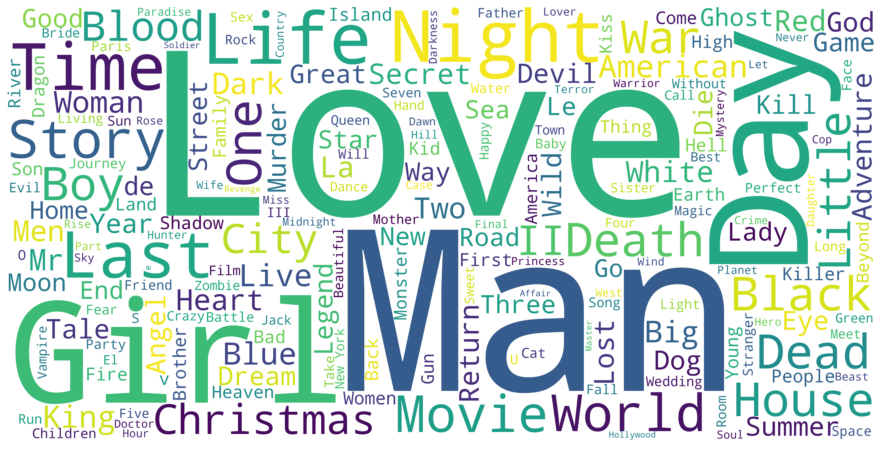

In [15]:
plt.figure(figsize = (16,8))
plt.imshow(title_wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

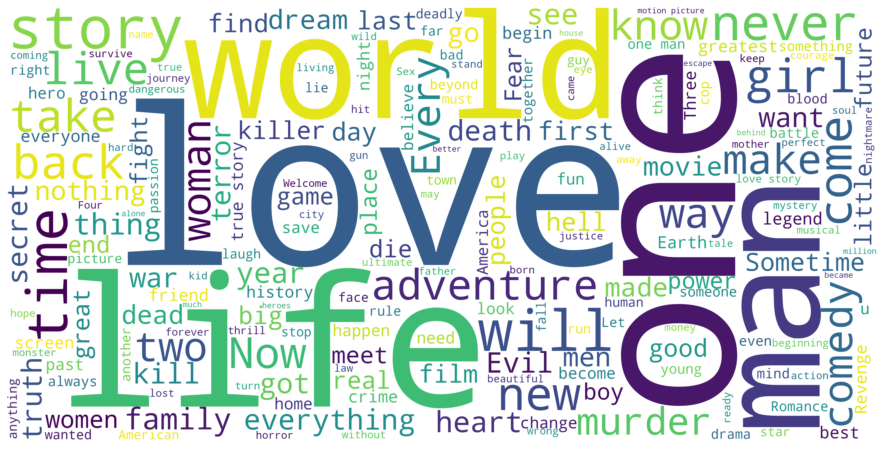

In [16]:
tagline_wordcloud = WordCloud(background_color = "white", height = 2000, width = 4000).generate(tagline_corpus)
plt.figure(figsize = (16, 8))
plt.imshow(tagline_wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

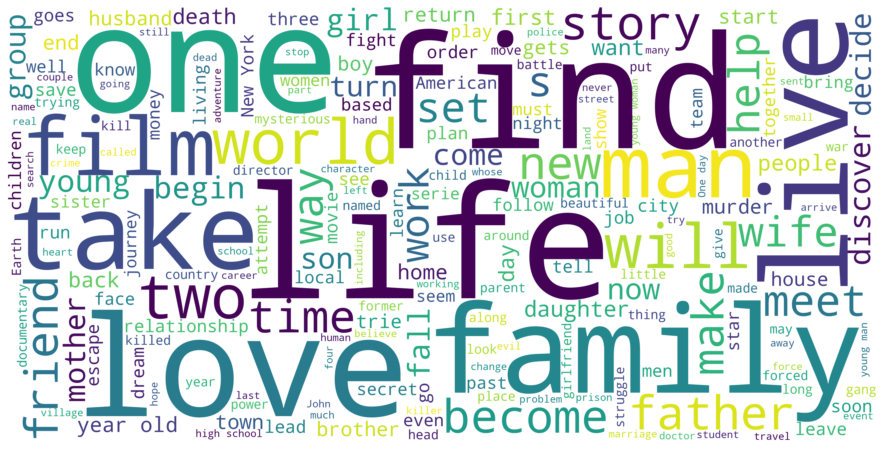

In [20]:
overview_wordcloud = WordCloud(background_color = "white", height = 2000, width = 4000).generate(overview_corpus)
plt.figure(figsize = (16,8))
plt.imshow(overview_wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

# Are Franchises more successful?

In [22]:
df

,id,title,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,production_countries,vote_count,vote_average,popularity,runtime,overview,spoken_languages,poster_path,cast,cast_size,crew_size,director
0,862,Toy Story,NaN,1995-10-30,Animation|Comedy|Family,Toy Story Collection,en,30.00,373.55,Pixar Animation Studios,United States of America,5415.00,7.70,21.95,81.00,"Led by Woody, Andy's toys live happily in his ...",English,<img src='http://image.tmdb.org/t/p/w185//uXDf...,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,13,106,John Lasseter
1,8844,Jumanji,Roll the dice and unleash the excitement!,1995-12-15,Adventure|Fantasy|Family,NaN,en,65.00,262.80,TriStar Pictures|Teitler Film|Interscope Commu...,United States of America,2413.00,6.90,17.02,104.00,When siblings Judy and Peter discover an encha...,English|Français,<img src='http://image.tmdb.org/t/p/w185//vgpX...,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,26,16,Joe Johnston
2,15602,Grumpier Old Men,Still Yelling. Still Fighting. Still Ready for...,1995-12-22,Romance|Comedy,Grumpy Old Men Collection,en,NaN,NaN,Warner Bros.|Lancaster Gate,United States of America,92.00,6.50,11.71,101.00,A family wedding reignites the ancient feud be...,English,<img src='http://image.tmdb.org/t/p/w185//1FSX...,Walter Matthau|Jack Lemmon|Ann-Margret|Sophia ...,7,4,Howard Deutch
3,31357,Waiting to Exhale,Friends are the people who let you be yourself...,1995-12-22,Comedy|Drama|Romance,NaN,en,16.00,81.45,Twentieth Century Fox Film Corporation,United States of America,34.00,6.10,3.86,127.00,"Cheated on, mistreated and stepped on, the wom...",English,<img src='http://image.tmdb.org/t/p/w185//4wjG...,Whitney Houston|Angela Bassett|Loretta Devine|...,10,10,Forest Whitaker
4,11862,Father of the Bride Part II,Just When His World Is Back To Normal... He's ...,1995-02-10,Comedy,Father of the Bride Collection,en,NaN,76.58,Sandollar Productions|Touchstone Pictures,United States of America,173.00,5.70,8.39,106.00,Just when George Banks has recovered from his ...,English,<img src='http://image.tmdb.org/t/p/w185//lf9R...,Steve Martin|Diane Keaton|Martin Short|Kimberl...,12,7,Charles Shyer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44686,439050,Subdue,Rising and falling between a man and woman,NaT,Drama|Family,NaN,fa,NaN,NaN,NaN,Iran,1.00,4.00,0.07,90.00,Rising and falling between a man and woman.,فارسی,<img src='http://image.tmdb.org/t/p/w185//pfC8...,Leila Hatami|Kourosh Tahami|Elham Korda,3,9,Hamid Nematollah
44687,111109,Century of Birthing,NaN,2011-11-17,Drama,NaN,tl,NaN,NaN,Sine Olivia,Philippines,3.00,9.00,0.18,360.00,An artist struggles to finish his work while a...,NaN,<img src='http://image.tmdb.org/t/p/w185//xZkm...,Angel Aquino|Perry Dizon|Hazel Orencio|Joel To...,11,6,Lav Diaz
44688,67758,Betrayal,A deadly game of wits.,2003-08-01,Action|Drama|Thriller,NaN,en,NaN,NaN,American World Pictures,United States of America,6.00,3.80,0.90,90.00,"When one of her hits goes wrong, a professiona...",English,<img src='http://image.tmdb.org/t/p/w185//eGga...,Erika Eleniak|Adam Baldwin|Julie du Page|James...,15,5,Mark L. Lester
44689,227506,Satan Triumphant,NaN,1917-10-21,NaN,NaN,en,NaN,NaN,Yermoliev,Russia,0.00,NaN,0.00,87.00,"In a small town live two brothers, one a minis...",NaN,<img src='http://image.tmdb.org/t/p/w185//aorB...,Iwan Mosschuchin|Nathalie Lissenko|Pavel Pavlo...,5,2,Yakov Protazanov


In [21]:
df.belongs_to_collection

0                  Toy Story Collection
1                                   NaN
2             Grumpy Old Men Collection
3                                   NaN
4        Father of the Bride Collection
                      ...              
44686                               NaN
44687                               NaN
44688                               NaN
44689                               NaN
44690                               NaN
Name: belongs_to_collection, Length: 44691, dtype: object

In [24]:
df["Franchise"] = df.belongs_to_collection.notna()

In [25]:
df.Franchise

0         True
1        False
2         True
3        False
4         True
         ...  
44686    False
44687    False
44688    False
44689    False
44690    False
Name: Franchise, Length: 44691, dtype: bool

In [26]:
df.Franchise.value_counts()

False    40228
True      4463
Name: Franchise, dtype: int64

## Franchise vs. Stand-alone: Average Revenue

In [28]:
df.groupby("Franchise").revenue_musd.mean()

Franchise
False    44.74
True    165.71
Name: revenue_musd, dtype: float64

## Franchise vs. Stand-alone: Return on Investment/ Profitability

In [29]:
df["ROI"] = df.revenue_musd.div(df.budget_musd)

In [30]:
df.groupby("Franchise").ROI.median()

Franchise
False   1.62
True    3.71
Name: ROI, dtype: float64

## Franchise vs. Stand-alone: Average Budget

In [32]:
df.groupby("Franchise").budget_musd.mean()

Franchise
False   18.05
True    38.32
Name: budget_musd, dtype: float64

## Franchise vs. Stand-alone: Average Popularity

In [37]:
df.groupby("Franchise").popularity.mean()

Franchise
False   2.59
True    6.25
Name: popularity, dtype: float64

## Franchise vs. Stand-alone: Average Rating

In [39]:
df.groupby("Franchise").vote_average.mean()

Franchise
False   6.01
True    5.96
Name: vote_average, dtype: float64

In [41]:
df.groupby("Franchise").agg({"budget_musd" : "mean", "revenue_musd" : "mean", "vote_average" : "mean",
                            "popularity" : "mean", "ROI" : "median", "vote_count" : "mean"})

,budget_musd,revenue_musd,vote_average,popularity,ROI,vote_count
Franchise,,,,,,
False,18.05,44.74,6.01,2.59,1.62,78.29
True,38.32,165.71,5.96,6.25,3.71,412.39


# Most Succesful Franchises

In [43]:
df.belongs_to_collection

0                  Toy Story Collection
1                                   NaN
2             Grumpy Old Men Collection
3                                   NaN
4        Father of the Bride Collection
                      ...              
44686                               NaN
44687                               NaN
44688                               NaN
44689                               NaN
44690                               NaN
Name: belongs_to_collection, Length: 44691, dtype: object

In [44]:
df.belongs_to_collection.value_counts()

The Bowery Boys                  29
Totò Collection                  27
Zatôichi: The Blind Swordsman    26
James Bond Collection            26
The Carry On Collection          25
                                 ..
Salt and Pepper Collection        1
Deadpool Collection               1
Ant-Man Collection                1
Elvira Collection                 1
Red Lotus Collection              1
Name: belongs_to_collection, Length: 1691, dtype: int64

In [46]:
franchises = df.groupby("belongs_to_collection").agg({"title":"count", "budget_musd":["sum", "mean"],
                                                      "revenue_musd":["sum", "mean"],
                                                      "vote_average":"mean", "popularity":"mean",
                                                      "ROI":"median",
                                                      "vote_count":"mean"})

In [47]:
franchises

title budget_musd       revenue_musd  \
                                     count         sum  mean          sum   
belongs_to_collection                                                       
... Has Fallen Collection                2      130.00 65.00       366.78   
00 Schneider Filmreihe                   1        0.00   NaN         0.00   
08/15 Collection                         1        0.00   NaN         0.00   
100 Girls Collection                     2        0.00   NaN         0.00   
101 Dalmatians (Animated) Collection     2        4.00  4.00       215.88   
...                                    ...         ...   ...          ...   
Сказки Чуковского                        1        0.00   NaN         0.00   
Чебурашка и крокодил Гена                1        0.00   NaN         0.00   
Что Творят мужчины! (Коллекция)          2        2.00  2.00         0.00   
男はつらいよ シリーズ                              3        0.00   NaN         0.00   
식객 시리즈                                   2        0.00   NaN         0.00   

                                            vote_average popularity    ROI  \
                                       mean         mean       mean median   
belongs_to_collection                                                        
... Has Fallen Collection            183.39         6.00      13.01   2.86   
00 Schneider Filmreihe                  NaN         6.50       1.93    NaN   
08/15 Collection                        NaN         5.90       0.63    NaN   
100 Girls Collection                    NaN         5.15       3.08    NaN   
101 Dalmatians (Animated) Collection 215.88         6.25      13.06  53.97   
...                                     ...          ...        ...    ...   
Сказки Чуковского                       NaN         3.00       0.73    NaN   
Чебурашка и крокодил Гена               NaN         6.70       0.88    NaN   
Что Творят мужчины! (Коллекция)         NaN         3.15       1.30    NaN   
男はつらいよ シリーズ                             NaN         7.00       0.04    NaN   
식객 시리즈                                  NaN         4.95       0.16    NaN   

                                     vote_count  
                                           mean  
belongs_to_collection                            
... Has Fallen Collection               2333.00  
00 Schneider Filmreihe                    16.00  
08/15 Collection                           4.00  
100 Girls Collection                      64.00  
101 Dalmatians (Animated) Collection     937.00  
...                                         ...  
Сказки Чуковского                          3.00  
Чебурашка и крокодил Гена                  7.00  
Что Творят мужчины! (Коллекция)            5.50  
男はつらいよ シリーズ                                0.67  
식객 시리즈                                     3.50  

[1691 rows x 9 columns]

In [48]:
franchises.nlargest(20, ("title", "count"))

title budget_musd       revenue_musd  \
                                       count         sum  mean          sum   
belongs_to_collection                                                         
The Bowery Boys                           29        0.00   NaN         0.00   
Totò Collection                           27        0.00   NaN         0.00   
James Bond Collection                     26     1539.65 59.22      7106.97   
Zatôichi: The Blind Swordsman             26        0.00   NaN         0.00   
The Carry On Collection                   25        0.00   NaN         0.00   
Charlie Chan (Sidney Toler) Collection    21        0.00   NaN         0.00   
Pokémon Collection                        20      250.72 50.14       601.87   
Godzilla (Showa) Collection               16        2.81  0.56         0.00   
Charlie Chan (Warner Oland) Collection    15        0.00   NaN         0.00   
Dragon Ball Z (Movie) Collection          15        5.00  5.00       112.12   
Uuno Turhapuro                            15        0.00   NaN         0.00   
Monster High Collection                   14        0.50  0.50         0.00   
The Land Before Time Collection           14       12.30 12.30        84.46   
George Carlin Comedy Collection           13        0.00   NaN         0.00   
Sharpe Collection                         13        0.00   NaN         0.00   
Friday the 13th Collection                12       84.40  7.03       464.90   
Johan Falk GSI Collection                 12        0.00   NaN         0.00   
Sherlock Holmes (1939 series)             12        0.00   NaN         0.00   
The Amityville Horror Collection          12       21.02  5.25       213.35   
An American Girl Collection               10        6.80  6.80         0.00   

                                              vote_average popularity    ROI  \
                                         mean         mean       mean median   
belongs_to_collection                                                          
The Bowery Boys                           NaN         6.67       0.20    NaN   
Totò Collection                           NaN         6.84       1.05    NaN   
James Bond Collection                  273.35         6.34      13.45   6.13   
Zatôichi: The Blind Swordsman             NaN         6.40       1.10    NaN   
The Carry On Collection                   NaN         6.17       3.22    NaN   
Charlie Chan (Sidney Toler) Collection    NaN         6.61       0.63    NaN   
Pokémon Collection                      66.87         6.05       4.37   4.46   
Godzilla (Showa) Collection               NaN         5.97       3.42    NaN   
Charlie Chan (Warner Oland) Collection    NaN         6.66       0.66    NaN   
Dragon Ball Z (Movie) Collection        56.06         6.61       6.18  12.35   
Uuno Turhapuro                            NaN         5.53       0.17    NaN   
Monster High Collection                   NaN         6.49       3.59    NaN   
The Land Before Time Collection         84.46         6.16       4.91   6.87   
George Carlin Comedy Collection           NaN         7.47       1.30    NaN   
Sharpe Collection                         NaN         6.74       1.71    NaN   
Friday the 13th Collection              38.74         5.42       9.76   6.67   
Johan Falk GSI Collection                 NaN         6.50       1.52    NaN   
Sherlock Holmes (1939 series)             NaN         6.92       2.88    NaN   
The Amityville Horror Collection        53.34         4.36       7.18   5.69   
An American Girl Collection               NaN         5.25       1.94    NaN   

                                       vote_count  
                                             mean  
belongs_to_collection                              
The Bowery Boys                              0.72  
Totò Collection                             18.04  
James Bond Collection                     1284.31  
Zatôichi: The Blind Swordsman               11.19  
The Carry On Col

In [49]:
franchises.nlargest(20,("revenue_musd","sum"))

title budget_musd        revenue_musd  \
                                    count         sum   mean          sum   
belongs_to_collection                                                       
Harry Potter Collection                 8     1280.00 160.00      7707.37   
Star Wars Collection                    8      854.35 106.79      7434.49   
James Bond Collection                  26     1539.65  59.22      7106.97   
The Fast and the Furious Collection     8     1009.00 126.12      5125.10   
Pirates of the Caribbean Collection     5     1250.00 250.00      4521.58   
Transformers Collection                 5      965.00 193.00      4366.10   
Despicable Me Collection                6      299.00  74.75      3691.07   
The Twilight Collection                 5      385.00  77.00      3342.11   
Ice Age Collection                      5      429.00  85.80      3216.71   
Jurassic Park Collection                4      379.00  94.75      3031.48   
Shrek Collection                        5      535.00 133.75      2955.81   
The Hunger Games Collection             4      490.00 122.50      2944.16   
The Hobbit Collection                   3      750.00 250.00      2935.52   
The Avengers Collection                 2      500.00 250.00      2924.96   
The Lord of the Rings Collection        3      266.00  88.67      2916.54   
X-Men Collection                        6      983.00 163.83      2808.83   
Avatar Collection                       1      237.00 237.00      2787.97   
Mission: Impossible Collection          5      650.00 130.00      2778.98   
Spider-Man Collection                   3      597.00 199.00      2496.35   
The Dark Knight Collection              3      585.00 195.00      2463.72   

                                            vote_average popularity    ROI  \
                                       mean         mean       mean median   
belongs_to_collection                                                        
Harry Potter Collection              963.42         7.54      26.25   6.17   
Star Wars Collection                 929.31         7.38      23.41   8.24   
James Bond Collection                273.35         6.34      13.45   6.13   
The Fast and the Furious Collection  640.64         6.66      10.80   4.94   
Pirates of the Caribbean Collection  904.32         6.88      53.97   3.45   
Transformers Collection              873.22         6.14      14.43   5.20   
Despicable Me Collection             922.77         6.78     106.72  12.76   
The Twilight Collection              668.42         5.84      29.50  10.27   
Ice Age Collection                   643.34         6.38      16.08   8.26   
Jurassic Park Collection             757.87         6.50      10.77   7.03   
Shrek Collection                     738.95         6.46      12.97   5.56   
The Hunger Games Collection          736.04         6.88      54.77   6.27   
The Hobbit Collection                978.51         7.23      25.21   3.83   
The Avengers Collection             1462.48         7.35      63.63   5.96   
The Lord of the Rings Collection     972.18         8.03      30.27  11.73   
X-Men Collection                     468.14         6.82       9.71   3.02   
Avatar Collection                   2787.97         7.20     185.07  11.76   
Mission: Impossible Collection       555.80         6.60      16.51   4.55   
Spider-Man Collection                832.12         6.47      22.62   3.92   
The Dark Knight Collection           821.24         7.80      57.42   4.34   

                                    vote_count  
                                          mean  
belongs_to_collection                           
Harry Potter Collection                5983.25  
Star Wars Collection                   5430.38  
James Bond Collection                  1284.31  
The Fast and the Furious Collection    3197.00  
Pirates of the Caribbean Collection    5016.00  
Transformers Collection                3046.40  
Despicable Me Collection    

In [50]:
franchises.nlargest(20,("budget_musd", "sum"))

title budget_musd        revenue_musd  \
                                        count         sum   mean          sum   
belongs_to_collection                                                           
James Bond Collection                      26     1539.65  59.22      7106.97   
Harry Potter Collection                     8     1280.00 160.00      7707.37   
Pirates of the Caribbean Collection         5     1250.00 250.00      4521.58   
The Fast and the Furious Collection         8     1009.00 126.12      5125.10   
X-Men Collection                            6      983.00 163.83      2808.83   
Transformers Collection                     5      965.00 193.00      4366.10   
Star Wars Collection                        8      854.35 106.79      7434.49   
The Hobbit Collection                       3      750.00 250.00      2935.52   
The Terminator Collection                   5      661.40 132.28      1845.33   
Mission: Impossible Collection              5      650.00 130.00      2778.98   
Spider-Man Collection                       3      597.00 199.00      2496.35   
The Dark Knight Collection                  3      585.00 195.00      2463.72   
Captain America Collection                  3      560.00 186.67      2238.64   
The Chronicles of Narnia Collection         3      560.00 186.67      1584.14   
Iron Man Collection                         3      540.00 180.00      2424.55   
Shrek Collection                            5      535.00 133.75      2955.81   
Star Trek: Alternate Reality Collection     3      525.00 175.00      1196.52   
Madagascar Collection                       4      502.00 125.50      2257.05   
The Avengers Collection                     2      500.00 250.00      2924.96   
Cars Collection                             3      495.00 165.00      1372.01   

                                                vote_average popularity  \
                                           mean         mean       mean   
belongs_to_collection                                                     
James Bond Collection                    273.35         6.34      13.45   
Harry Potter Collection                  963.42         7.54      26.25   
Pirates of the Caribbean Collection      904.32         6.88      53.97   
The Fast and the Furious Collection      640.64         6.66      10.80   
X-Men Collection                         468.14         6.82       9.71   
Transformers Collection                  873.22         6.14      14.43   
Star Wars Collection                     929.31         7.38      23.41   
The Hobbit Collection                    978.51         7.23      25.21   
The Terminator Collection                369.07         6.54      21.89   
Mission: Impossible Collection           555.80         6.60      16.51   
Spider-Man Collection                    832.12         6.47      22.62   
The Dark Knight Collection               821.24         7.80      57.42   
Captain America Collection               746.21         7.10      61.31   
The Chronicles of Narnia Collection      528.05         6.40      14.34   
Iron Man Collection                      808.18         6.93      21.63   
Shrek Collection                         738.95         6.46      12.97   
Star Trek: Alternate Reality Collection  398.84         7.13      17.27   
Madagascar Collection                    564.26         6.42      16.21   
The Avengers Collection                 1462.48         7.35      63.63   
Cars Collection                          457.34         6.33      17.25   

                                           ROI vote_count  
                                        median       mean  
belongs_to_collection                                      
James Bond Collection                     6.13    1284.31  
Harry Potter Collection                   6.17    5983.25  
Pirates of the Caribbean Collection       3.45    5016.00  
The Fast and the Furious Collection       4.94    3197.00  
X-Men Collection              

In [53]:
franchises[franchises[("vote_count", "mean")]>=1000].nlargest(20, ("vote_average", "mean"))

title budget_musd        revenue_musd  \
                                    count         sum   mean          sum   
belongs_to_collection                                                       
The Lord of the Rings Collection        3      266.00  88.67      2916.54   
The Godfather Collection                3       73.00  24.33       429.38   
Blade Runner Collection                 1       28.00  28.00        33.14   
The Man With No Name Collection         3        2.00   0.67        35.50   
The Dark Knight Collection              3      585.00 195.00      2463.72   
Guardians of the Galaxy Collection      2      370.00 185.00      1636.74   
Kill Bill Collection                    2       60.00  30.00       333.11   
Kingsman Collection                     1       81.00  81.00       414.35   
How to Train Your Dragon Collection     2      310.00 155.00      1104.00   
Harry Potter Collection                 8     1280.00 160.00      7707.37   
Toy Story Collection                    3      320.00 106.67      1937.89   
Back to the Future Collection           3       99.00  33.00       957.64   
Trainspotting Collection                2       22.00  11.00        57.90   
Deadpool Collection                     1       58.00  58.00       783.11   
The Incredibles Collection              1       92.00  92.00       631.44   
Star Wars Collection                    8      854.35 106.79      7434.49   
The Avengers Collection                 2      500.00 250.00      2924.96   
The Lego Movie Collection               2      140.00  70.00       781.11   
Tangled Collection                      2      260.00 260.00       591.79   
The Space Odyssey Series                2       38.50  19.25       109.10   

                                            vote_average popularity    ROI  \
                                       mean         mean       mean median   
belongs_to_collection                                                        
The Lord of the Rings Collection     972.18         8.03      30.27  11.73   
The Godfather Collection             143.13         7.97      31.64   3.66   
Blade Runner Collection               33.14         7.90      96.27   1.18   
The Man With No Name Collection       11.83         7.83      14.17  25.00   
The Dark Knight Collection           821.24         7.80      57.42   4.34   
Guardians of the Galaxy Collection   818.37         7.75     119.31   4.43   
Kill Bill Collection                 166.55         7.70      23.40   5.55   
Kingsman Collection                  414.35         7.60      28.22   5.12   
How to Train Your Dragon Collection  552.00         7.55      13.34   3.60   
Harry Potter Collection              963.42         7.54      26.25   6.17   
Toy Story Collection                 645.96         7.53      18.82   5.53   
Back to the Future Collection        319.21         7.50      17.50   8.30   
Trainspotting Collection              28.95         7.45      18.50   3.21   
Deadpool Collection                  783.11         7.40     187.86  13.50   
The Incredibles Collection           631.44         7.40      22.22   6.86   
Star Wars Collection                 929.31         7.38      23.41   8.24   
The Avengers Collection             1462.48         7.35      63.63   5.96   
The Lego Movie Collection            390.56         7.35      16.74   5.86   
Tangled Collection                   591.79         7.25      12.32   2.28   
The Space Odyssey Series              54.55         7.25      14.99   3.99   

                                    vote_count  
                                          mean  
belongs_to_collection                           
The Lord of the Rings Collection       8253.00  
The Godfather Collection               3677.00  
Blade Runner Collection                3833.00  
The Man With No Name Collection        1422.67  
The Dark Knight Collection             9681.00  
Guardians of the Galaxy Collection     7436.00  
Kill Bill Collection        

# The Most Successful Directors

In [56]:
df.director


0           John Lasseter
1            Joe Johnston
2           Howard Deutch
3         Forest Whitaker
4           Charles Shyer
               ...       
44686    Hamid Nematollah
44687            Lav Diaz
44688      Mark L. Lester
44689    Yakov Protazanov
44690       Daisy Asquith
Name: director, Length: 44691, dtype: object

In [57]:
df.director.value_counts().head(20)

John Ford             66
Michael Curtiz        65
Werner Herzog         54
Alfred Hitchcock      53
Georges Méliès        49
Woody Allen           49
Jean-Luc Godard       46
Sidney Lumet          46
Charlie Chaplin       44
Raoul Walsh           43
William A. Wellman    42
Henry Hathaway        41
Richard Thorpe        40
Ingmar Bergman        39
Martin Scorsese       39
Fritz Lang            38
John Huston           38
George Cukor          38
Mervyn LeRoy          37
Robert Altman         37
Name: director, dtype: int64

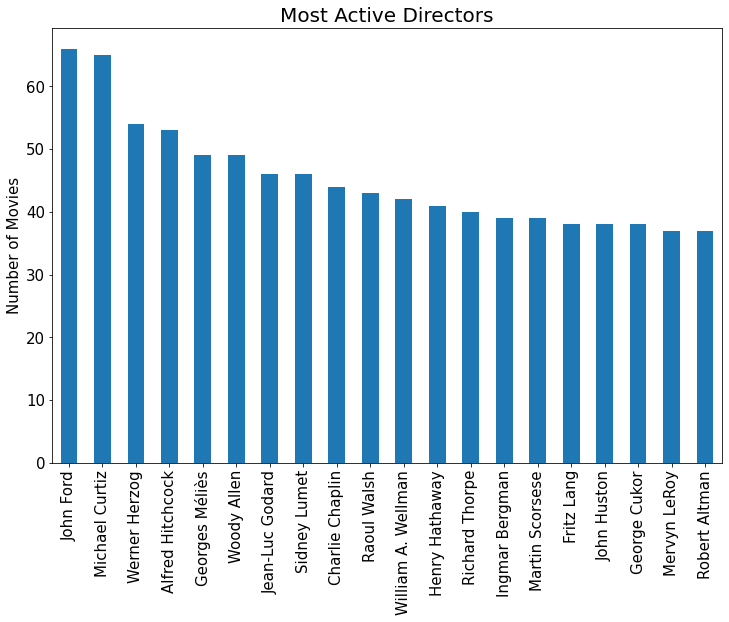

In [59]:
plt.figure(figsize = (12,8))
df.director.value_counts().head(20).plot(kind = "bar", fontsize = 15)
plt.title("Most Active Directors", fontsize = 20)
plt.ylabel("Number of Movies", fontsize = 15)
plt.show()

In [60]:
df.groupby("director").revenue_musd.sum().nlargest(20)

director
Steven Spielberg    9256.62
Peter Jackson       6528.24
Michael Bay         6437.47
James Cameron       5900.61
David Yates         5334.56
Christopher Nolan   4747.41
Robert Zemeckis     4138.23
Tim Burton          4032.92
Ridley Scott        3917.53
Chris Columbus      3866.84
Roland Emmerich     3798.40
Ron Howard          3714.15
J.J. Abrams         3579.22
Gore Verbinski      3575.34
George Lucas        3341.55
Sam Raimi           3193.79
Francis Lawrence    3183.34
Clint Eastwood      3100.68
Bill Condon         3017.30
Joss Whedon         2963.83
Name: revenue_musd, dtype: float64

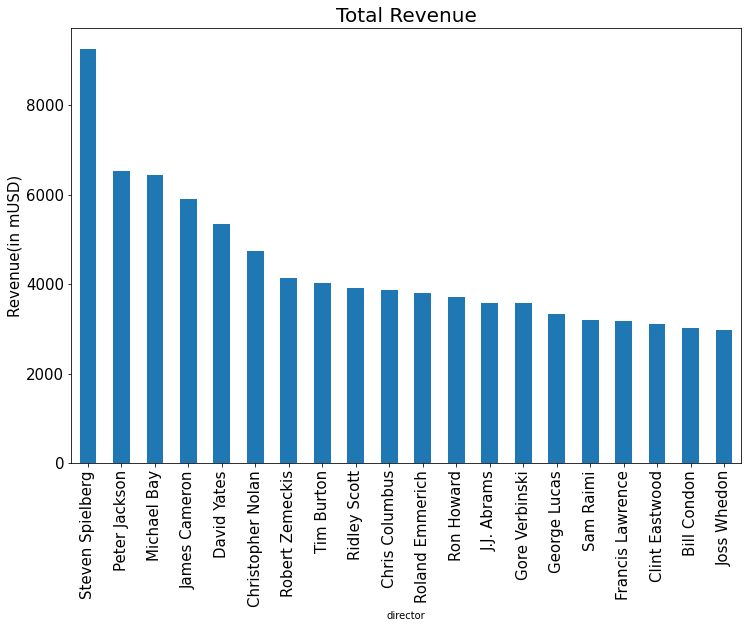

In [61]:
plt.figure(figsize = (12, 8))
df.groupby("director").revenue_musd.sum().nlargest(20).plot(kind = "bar", fontsize = 15)
plt.title("Total Revenue", fontsize = 20)
plt.ylabel("Revenue(in mUSD)", fontsize = 15)
plt.show()

In [66]:
directors = df.groupby("director").agg({"title":"count", "vote_average":"mean", "vote_count":"sum"})

In [67]:
directors

,title,vote_average,vote_count
director,,,
Dale Trevillion\t,2,4.00,4.00
Davide Manuli,1,6.90,10.00
E.W. Swackhamer,1,5.90,5.00
Vitaliy Vorobyov,1,5.50,3.00
Yeon Sang-Ho,4,6.60,1039.00
...,...,...,...
Ярополк Лапшин,1,10.00,1.00
پیمان معادی,1,6.00,2.00
塩谷 直義,1,7.20,40.00


In [68]:
directors[(directors.vote_count >=1000) & (directors.title >= 10)].nlargest(20, "vote_average")

,title,vote_average,vote_count
director,,,
Hayao Miyazaki,14,7.70,14700.00
Christopher Nolan,11,7.62,67344.00
Krzysztof Kieślowski,10,7.51,1105.00
Quentin Tarantino,10,7.49,45910.00
Wes Anderson,10,7.37,11743.00
David Fincher,10,7.35,37588.00
Akira Kurosawa,30,7.28,3621.00
Spike Jonze,13,7.27,6665.00
Martin Scorsese,39,7.22,35541.00


In [69]:
df.genres = df.genres.astype(str)

In [73]:
df.loc[df.genres.str.contains("Horror")].groupby("director").revenue_musd.sum().nlargest(20)

director
Paul W.S. Anderson    982.29
James Wan             861.31
Wes Craven            834.93
Francis Lawrence      816.23
Ridley Scott          689.00
Marc Forster          531.87
Steven Spielberg      500.10
William Friedkin      466.40
Darren Lynn Bousman   456.34
M. Night Shyamalan    375.37
Henry Joost           349.07
David R. Ellis        348.74
Adrian Lyne           346.11
James DeMonaco        316.70
Stephen Sommers       311.46
Gore Verbinski        275.91
Guillermo del Toro    261.63
John R. Leonetti      255.27
Fede Alvarez          254.64
Jordan Peele          252.43
Name: revenue_musd, dtype: float64

# Most Successful Actors (Part1)

In [74]:
df.cast

0        Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...
1        Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...
2        Walter Matthau|Jack Lemmon|Ann-Margret|Sophia ...
3        Whitney Houston|Angela Bassett|Loretta Devine|...
4        Steve Martin|Diane Keaton|Martin Short|Kimberl...
                               ...                        
44686              Leila Hatami|Kourosh Tahami|Elham Korda
44687    Angel Aquino|Perry Dizon|Hazel Orencio|Joel To...
44688    Erika Eleniak|Adam Baldwin|Julie du Page|James...
44689    Iwan Mosschuchin|Nathalie Lissenko|Pavel Pavlo...
44690                                                  NaN
Name: cast, Length: 44691, dtype: object

In [75]:
df

,id,title,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,production_countries,vote_count,vote_average,popularity,runtime,overview,spoken_languages,poster_path,cast,cast_size,crew_size,director,Franchise,ROI
0,862,Toy Story,NaN,1995-10-30,Animation|Comedy|Family,Toy Story Collection,en,30.00,373.55,Pixar Animation Studios,United States of America,5415.00,7.70,21.95,81.00,"Led by Woody, Andy's toys live happily in his ...",English,<img src='http://image.tmdb.org/t/p/w185//uXDf...,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,13,106,John Lasseter,True,12.45
1,8844,Jumanji,Roll the dice and unleash the excitement!,1995-12-15,Adventure|Fantasy|Family,NaN,en,65.00,262.80,TriStar Pictures|Teitler Film|Interscope Commu...,United States of America,2413.00,6.90,17.02,104.00,When siblings Judy and Peter discover an encha...,English|Français,<img src='http://image.tmdb.org/t/p/w185//vgpX...,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,26,16,Joe Johnston,False,4.04
2,15602,Grumpier Old Men,Still Yelling. Still Fighting. Still Ready for...,1995-12-22,Romance|Comedy,Grumpy Old Men Collection,en,NaN,NaN,Warner Bros.|Lancaster Gate,United States of America,92.00,6.50,11.71,101.00,A family wedding reignites the ancient feud be...,English,<img src='http://image.tmdb.org/t/p/w185//1FSX...,Walter Matthau|Jack Lemmon|Ann-Margret|Sophia ...,7,4,Howard Deutch,True,NaN
3,31357,Waiting to Exhale,Friends are the people who let you be yourself...,1995-12-22,Comedy|Drama|Romance,NaN,en,16.00,81.45,Twentieth Century Fox Film Corporation,United States of America,34.00,6.10,3.86,127.00,"Cheated on, mistreated and stepped on, the wom...",English,<img src='http://image.tmdb.org/t/p/w185//4wjG...,Whitney Houston|Angela Bassett|Loretta Devine|...,10,10,Forest Whitaker,False,5.09
4,11862,Father of the Bride Part II,Just When His World Is Back To Normal... He's ...,1995-02-10,Comedy,Father of the Bride Collection,en,NaN,76.58,Sandollar Productions|Touchstone Pictures,United States of America,173.00,5.70,8.39,106.00,Just when George Banks has recovered from his ...,English,<img src='http://image.tmdb.org/t/p/w185//lf9R...,Steve Martin|Diane Keaton|Martin Short|Kimberl...,12,7,Charles Shyer,True,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44686,439050,Subdue,Rising and falling between a man and woman,NaT,Drama|Family,NaN,fa,NaN,NaN,NaN,Iran,1.00,4.00,0.07,90.00,Rising and falling between a man and woman.,فارسی,<img src='http://image.tmdb.org/t/p/w185//pfC8...,Leila Hatami|Kourosh Tahami|Elham Korda,3,9,Hamid Nematollah,False,NaN
44687,111109,Century of Birthing,NaN,2011-11-17,Drama,NaN,tl,NaN,NaN,Sine Olivia,Philippines,3.00,9.00,0.18,360.00,An artist struggles to finish his work while a...,NaN,<img src='http://image.tmdb.org/t/p/w185//xZkm...,Angel Aquino|Perry Dizon|Hazel Orencio|Joel To...,11,6,Lav Diaz,False,NaN
44688,67758,Betrayal,A deadly game of wits.,2003-08-01,Action|Drama|Thriller,NaN,en,NaN,NaN,American World Pictures,United States of America,6.00,3.80,0.90,90.00,"When one of her hits goes wrong, a professiona...",English,<img src='http://image.tmdb.org/t/p/w185//eGga...,Erika Eleniak|Adam Baldwin|Julie du Page|James...,15,5,Mark L. Lester,False,NaN
44689,227506,Satan Triumphant,NaN,1917-10-21,nan,NaN,en,NaN,NaN,Yermoliev,Russia,0.00,NaN,0.00,87.00,"In a small town live two brothers, one a minis...",NaN,<img src='http://image.tmdb.org/t/p/w185//aorB...,Iwan Mosschuchin|Nathalie Lissenko|Pavel Pavlo...,5,2,Yakov Protazanov,False,NaN


In [76]:
df.set_index("id", inplace = True)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44691 entries, 862 to 461257
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  44691 non-null  object        
 1   tagline                20284 non-null  object        
 2   release_date           44657 non-null  datetime64[ns]
 3   genres                 44691 non-null  object        
 4   belongs_to_collection  4463 non-null   object        
 5   original_language      44681 non-null  object        
 6   budget_musd            8854 non-null   float64       
 7   revenue_musd           7385 non-null   float64       
 8   production_companies   33356 non-null  object        
 9   production_countries   38835 non-null  object        
 10  vote_count             44691 non-null  float64       
 11  vote_average           42077 non-null  float64       
 12  popularity             44691 non-null  float64       
 13

In [78]:
df.cast

id
862       Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...
8844      Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...
15602     Walter Matthau|Jack Lemmon|Ann-Margret|Sophia ...
31357     Whitney Houston|Angela Bassett|Loretta Devine|...
11862     Steve Martin|Diane Keaton|Martin Short|Kimberl...
                                ...                        
439050              Leila Hatami|Kourosh Tahami|Elham Korda
111109    Angel Aquino|Perry Dizon|Hazel Orencio|Joel To...
67758     Erika Eleniak|Adam Baldwin|Julie du Page|James...
227506    Iwan Mosschuchin|Nathalie Lissenko|Pavel Pavlo...
461257                                                  NaN
Name: cast, Length: 44691, dtype: object

In [80]:
df.cast.str.split("|", expand = True)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,...,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
862,Tom Hanks,Tim Allen,Don Rickles,Jim Varney,Wallace Shawn,John Ratzenberger,Annie Potts,John Morris,Erik von Detten,Laurie Metcalf,R. Lee Ermey,Sarah Freeman,Penn Jillette,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
8844,Robin Williams,Jonathan Hyde,Kirsten Dunst,Bradley Pierce,Bonnie Hunt,Bebe Neuwirth,David Alan Grier,Patricia Clarkson,Adam Hann-Byrd,Laura Bell Bundy,James Handy,Gillian Barber,Brandon Obray,Cyrus Thiedeke,Gary Joseph Thorup,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
15602,Walter Matthau,Jack Lemmon,Ann-Margret,Sophia Loren,Daryl Hannah,Burgess Meredith,Kevin Pollak,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
31357,Whitney Houston,Angela Bassett,Loretta Devine,Lela Rochon,Gregory Hines,Dennis Haysbert,Michael Beach,Mykelti Williamson,Lamont Johnson,Wesley Snipes,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
11862,Steve Martin,Diane Keaton,Martin Short,Kimberly Williams-Paisley,George Newbern,Kieran Culkin,BD Wong,Peter Michael Goetz,Kate McGregor-Stewart,Jane Adams,Eugene Levy,Lori Alan,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439050,Leila Hatami,Kourosh Tahami,Elham Korda,None,None,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
111109,Angel Aquino,Perry Dizon,Hazel Orencio,Joel Torre,Bart Guingona,Soliman Cruz,Roeder,Angeli Bayani,Dante Perez,Betty Uy-Regala,Modesta,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
67758,Erika Eleniak,Adam Baldwin,Julie du Page,James Remar,Damian Chapa,Louis Mandylor,Tom Wright,Jeremy Lelliott,James Quattrochi,Jason Widener,Joe Sabatino,Kiko Ellsworth,Don Swayze,Peter Dobson,Darrell Dubovsky,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [81]:
act = df.cast.str.split("|", expand = True)
act

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,...,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
862,Tom Hanks,Tim Allen,Don Rickles,Jim Varney,Wallace Shawn,John Ratzenberger,Annie Potts,John Morris,Erik von Detten,Laurie Metcalf,R. Lee Ermey,Sarah Freeman,Penn Jillette,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
8844,Robin Williams,Jonathan Hyde,Kirsten Dunst,Bradley Pierce,Bonnie Hunt,Bebe Neuwirth,David Alan Grier,Patricia Clarkson,Adam Hann-Byrd,Laura Bell Bundy,James Handy,Gillian Barber,Brandon Obray,Cyrus Thiedeke,Gary Joseph Thorup,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
15602,Walter Matthau,Jack Lemmon,Ann-Margret,Sophia Loren,Daryl Hannah,Burgess Meredith,Kevin Pollak,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
31357,Whitney Houston,Angela Bassett,Loretta Devine,Lela Rochon,Gregory Hines,Dennis Haysbert,Michael Beach,Mykelti Williamson,Lamont Johnson,Wesley Snipes,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
11862,Steve Martin,Diane Keaton,Martin Short,Kimberly Williams-Paisley,George Newbern,Kieran Culkin,BD Wong,Peter Michael Goetz,Kate McGregor-Stewart,Jane Adams,Eugene Levy,Lori Alan,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439050,Leila Hatami,Kourosh Tahami,Elham Korda,None,None,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
111109,Angel Aquino,Perry Dizon,Hazel Orencio,Joel Torre,Bart Guingona,Soliman Cruz,Roeder,Angeli Bayani,Dante Perez,Betty Uy-Regala,Modesta,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
67758,Erika Eleniak,Adam Baldwin,Julie du Page,James Remar,Damian Chapa,Louis Mandylor,Tom Wright,Jeremy Lelliott,James Quattrochi,Jason Widener,Joe Sabatino,Kiko Ellsworth,Don Swayze,Peter Dobson,Darrell Dubovsky,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [86]:
act.stack().reset_index(level = 1, drop = True). to_frame()

,0
id,
862,Tom Hanks
862,Tim Allen
862,Don Rickles
862,Jim Varney
862,Wallace Shawn
...,...
227506,Iwan Mosschuchin
227506,Nathalie Lissenko
227506,Pavel Pavlov


In [87]:
act = act.stack().reset_index(level = 1, drop = True).to_frame()

In [90]:
act

,Actor
id,
862,Tom Hanks
862,Tim Allen
862,Don Rickles
862,Jim Varney
862,Wallace Shawn
...,...
227506,Iwan Mosschuchin
227506,Nathalie Lissenko
227506,Pavel Pavlov


In [89]:
act.columns = ["Actor"]

In [91]:
act = act.merge(df[["title", "revenue_musd", "vote_average", "popularity"]], 
               how = "left", left_index = True, right_index = True)

In [92]:
act

,Actor,title,revenue_musd,vote_average,popularity
id,,,,,
2,Turo Pajala,Ariel,NaN,7.10,3.86
2,Susanna Haavisto,Ariel,NaN,7.10,3.86
2,Matti Pellonpää,Ariel,NaN,7.10,3.86
2,Eetu Hilkamo,Ariel,NaN,7.10,3.86
3,Matti Pellonpää,Shadows in Paradise,NaN,7.10,2.29
...,...,...,...,...,...
469172,Vasco Sequeira,Manuel on the Island of Wonders,NaN,NaN,0.00
469172,Armanda Bacelar,Manuel on the Island of Wonders,NaN,NaN,0.00
469172,Rafael de Sousa,Manuel on the Island of Wonders,NaN,NaN,0.00


# Most Successful Actors (Part2)

In [93]:
act

,Actor,title,revenue_musd,vote_average,popularity
id,,,,,
2,Turo Pajala,Ariel,NaN,7.10,3.86
2,Susanna Haavisto,Ariel,NaN,7.10,3.86
2,Matti Pellonpää,Ariel,NaN,7.10,3.86
2,Eetu Hilkamo,Ariel,NaN,7.10,3.86
3,Matti Pellonpää,Shadows in Paradise,NaN,7.10,2.29
...,...,...,...,...,...
469172,Vasco Sequeira,Manuel on the Island of Wonders,NaN,NaN,0.00
469172,Armanda Bacelar,Manuel on the Island of Wonders,NaN,NaN,0.00
469172,Rafael de Sousa,Manuel on the Island of Wonders,NaN,NaN,0.00


In [94]:
act.Actor.nunique()

201501

In [96]:
act.Actor.unique()

array(['Turo Pajala', 'Susanna Haavisto', 'Matti Pellonpää', ...,
       'Armanda Bacelar', 'Rafael de Sousa', 'José Antônio Gomes'],
      dtype=object)

In [97]:
act.Actor.value_counts().head()

Bess Flowers         240
Christopher Lee      148
John Wayne           125
Samuel L. Jackson    122
Michael Caine        110
Name: Actor, dtype: int64

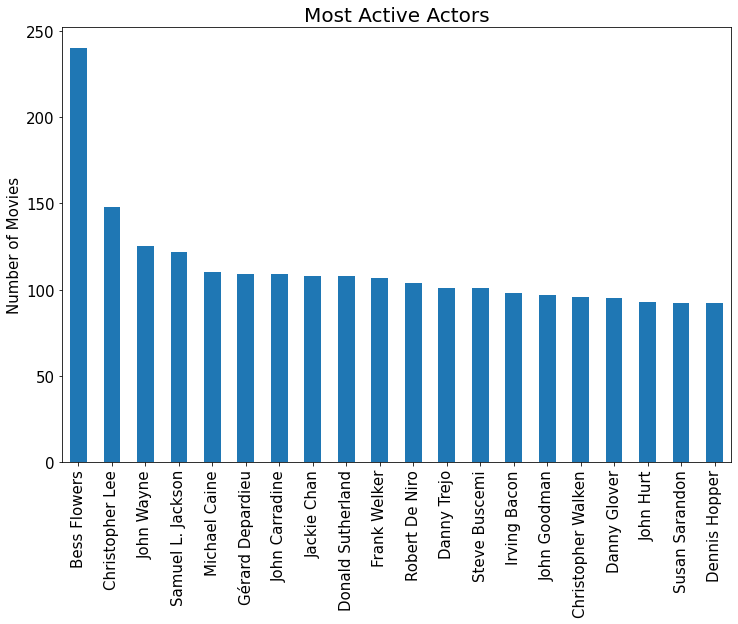

In [98]:
plt.figure(figsize = (12, 8))
act.Actor.value_counts().head(20).plot(kind = "bar", fontsize = 15)
plt.title("Most Active Actors", fontsize = 20)
plt.ylabel("Number of Movies", fontsize = 15)
plt.show()

In [100]:
agg = act.groupby("Actor").agg(Total_Revenue = ("revenue_musd", "sum"),
                              Mean_Revenue = ("revenue_musd", "mean"),
                              Mean_Rating = ("vote_average","mean"),
                              Mean_Pop = ("popularity","mean"),
                              Total_Movies = ("Actor", "count"))

In [101]:
agg.nlargest(10, "Total_Movies")

,Total_Revenue,Mean_Revenue,Mean_Rating,Mean_Pop,Total_Movies
Actor,,,,,
Bess Flowers,368.91,14.76,6.18,2.03,240
Christopher Lee,9417.05,324.73,5.91,4.75,148
John Wayne,236.09,11.24,5.71,3.09,125
Samuel L. Jackson,17109.62,213.87,6.27,11.70,122
Michael Caine,8053.40,191.75,6.27,8.27,110
Gérard Depardieu,1247.61,95.97,6.05,3.70,109
John Carradine,255.84,19.68,5.55,2.43,109
Donald Sutherland,5390.77,138.22,6.23,7.00,108
Jackie Chan,4699.19,146.85,6.28,5.86,108


In [103]:
agg.nlargest(10, "Total_Revenue")

,Total_Revenue,Mean_Revenue,Mean_Rating,Mean_Pop,Total_Movies
Actor,,,,,
Stan Lee,19414.96,647.17,6.51,29.94,48
Samuel L. Jackson,17109.62,213.87,6.27,11.70,122
Warwick Davis,13256.03,662.80,6.29,13.09,34
Frank Welker,13044.15,326.10,6.31,9.57,107
John Ratzenberger,12596.13,449.86,6.48,10.96,46
Jess Harnell,12234.61,611.73,6.44,10.92,35
Hugo Weaving,11027.58,459.48,6.47,10.97,40
Ian McKellen,11015.59,478.94,6.35,15.45,44
Johnny Depp,10653.76,217.42,6.44,12.38,69


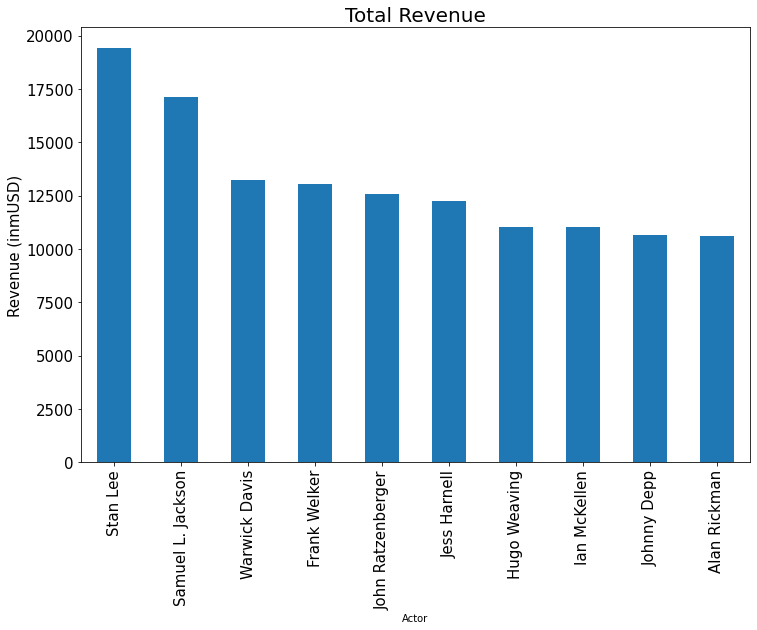

In [104]:
plt.figure(figsize = (12,8))
agg.Total_Revenue.nlargest(10).plot(kind = "bar", fontsize = 15)
plt.title("Total Revenue", fontsize = 20)
plt.ylabel("Revenue (inmUSD)", fontsize = 15)
plt.show()

In [106]:
agg.Mean_Revenue.nlargest(10)

Actor
April Marie Thomas   2787.97
Ashley Jeffery       2787.97
Austin Wilson        2787.97
Brandon Jelkes       2787.97
Bravita A. Threatt   2787.97
Carvon Futrell       2787.97
Chris Mala           2787.97
Christa Oliver       2787.97
Christopher Nolen    2787.97
Colin Bleasdale      2787.97
Name: Mean_Revenue, dtype: float64

In [107]:
act[act.Actor == "Ashley Jeffery"]

,Actor,title,revenue_musd,vote_average,popularity
id,,,,,
19995,Ashley Jeffery,Avatar,2787.97,7.20,185.07


In [109]:
agg[agg.Total_Movies >= 10].nlargest(10, "Mean_Revenue")

,Total_Revenue,Mean_Revenue,Mean_Rating,Mean_Pop,Total_Movies
Actor,,,,,
Gloria Stuart,1845.03,1845.03,6.37,3.48,18
Keith Richards,2967.71,989.24,6.46,5.03,23
Zoë Wanamaker,976.48,976.48,6.33,6.82,10
James Cameron,1862.08,931.04,7.06,4.69,12
Matthew Lewis,7915.31,879.48,7.37,23.10,11
Luke de Woolfson,1720.67,860.34,5.72,8.77,11
Yuri Lowenthal,1708.16,854.08,6.19,19.88,17
Dominic Monaghan,3289.61,822.40,6.05,10.62,11
Philip Ng,821.71,821.71,5.92,6.35,10


In [110]:
agg[agg.Total_Movies >= 10].nlargest(10, "Mean_Rating")

,Total_Revenue,Mean_Revenue,Mean_Rating,Mean_Pop,Total_Movies
Actor,,,,,
Masao Hayama,0.00,NaN,8.84,0.32,10
David Attenborough,0.00,NaN,8.27,2.15,11
Emil Jannings,0.00,NaN,7.78,1.70,10
Halit Akçatepe,0.21,0.21,7.78,0.74,10
Yo Oizumi,511.21,102.24,7.72,7.51,13
Şener Şen,11.07,3.69,7.69,0.91,16
Ayşen Gruda,0.91,0.46,7.68,0.74,10
Akira Tani,0.33,0.16,7.65,5.04,12
Joseph Oliveira,3543.44,354.34,7.64,34.45,10


In [112]:
agg[agg.Total_Movies >= 10].nlargest(10, "Mean_Pop")

,Total_Revenue,Mean_Revenue,Mean_Rating,Mean_Pop,Total_Movies
Actor,,,,,
Katy Mixon,1519.57,151.96,5.84,51.97,12
Terry Notary,6947.21,694.72,6.47,51.58,11
Goran D. Kleut,2568.94,366.99,6.00,42.32,10
Mark Smith,2195.52,243.95,6.55,40.08,11
Jon Hamm,3449.35,191.63,6.33,39.42,25
Gal Gadot,5449.53,495.41,6.33,37.39,11
Ava Acres,6272.36,482.49,5.99,36.26,21
Emma Watson,9639.20,535.51,6.77,35.97,19
Joseph Oliveira,3543.44,354.34,7.64,34.45,10
